In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\Airbnb NYC 2019.csv')
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [7]:
df.shape

(48895, 16)

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [50]:
#DO not replace date column with 0
#df['last_review']=df['last_review'].replace(np.nan,0)


In [51]:
df['reviews_per_month']=df['reviews_per_month'].replace(np.nan,0)

In [52]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [54]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [55]:
#removing outplayers
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    x=df[col][~((df[col]<lower_bound)|(df[col]>upper_bound))]
    return x

In [56]:
newdf=df.select_dtypes(include='int64')
newdf

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,149,1,9,6,365
1,2595,2845,225,1,45,2,355
3,3831,4869,89,1,270,1,194
4,5022,7192,80,10,9,1,0
5,5099,7322,200,3,74,1,129
...,...,...,...,...,...,...,...
48782,36425863,83554966,129,1,1,1,147
48790,36427429,257683179,45,1,1,6,339
48799,36438336,211644523,235,1,1,1,87
48805,36442252,273841667,100,1,2,1,40


Text(0.5, 1.0, 'price')

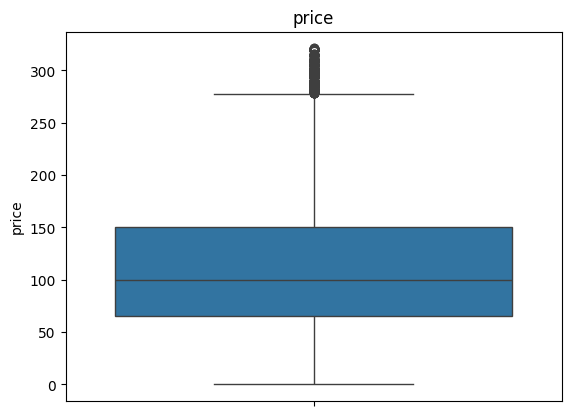

In [64]:
df_cleaned=remove_outliers(df,'price')
sns.boxplot(df_cleaned)
plt.title('price')

In [58]:
#1 Distribution of Airbnb Bookings Price Range using Histogram

In [59]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [60]:
df['price']

0        149
1        225
3         89
4         80
5        200
        ... 
48782    129
48790     45
48799    235
48805    100
48852     30
Name: price, Length: 38821, dtype: int64

<Axes: ylabel='price'>

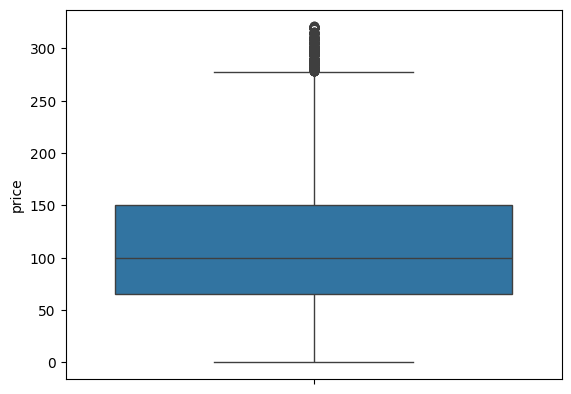

In [69]:
sns.boxplot(df_cleaned)

<Axes: xlabel='price', ylabel='Count'>

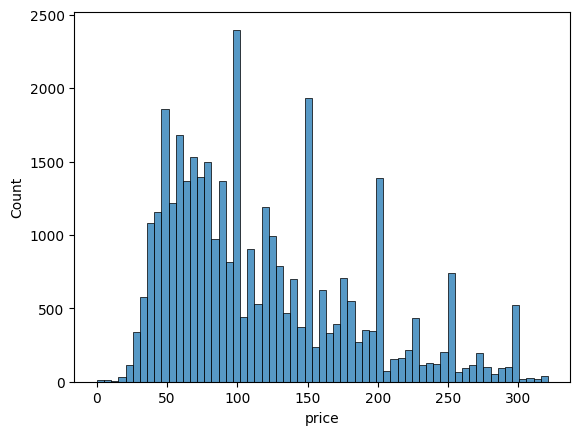

In [70]:
plt.xticks(range(0,350,50))
sns.histplot(df_cleaned)

(array([ 602., 7763., 8661., 6509., 5029., 2650., 2344., 1789.,  595.,
         802.]),
 array([  0. ,  32.1,  64.2,  96.3, 128.4, 160.5, 192.6, 224.7, 256.8,
        288.9, 321. ]),
 <BarContainer object of 10 artists>)

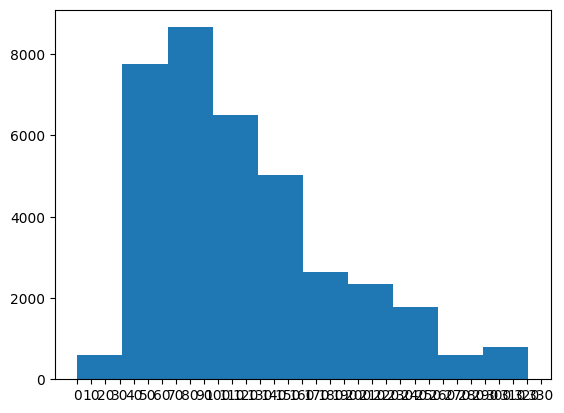

In [73]:
plt.xticks(range(0,350,10))
plt.hist(df_cleaned)

In [74]:
#2 Total Lising/Property Count in Each Neighborhood Group using Count Plot

In [75]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [81]:
counts=df['neighbourhood_group'].value_counts()
counts

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [84]:
counts=counts.reset_index()
counts

,index,neighbourhood_group,count
0,0,Manhattan,16621
1,1,Brooklyn,16439
2,2,Queens,4572
3,3,Bronx,875
4,4,Staten Island,314


Text(0, 0.5, 'total listing counts')

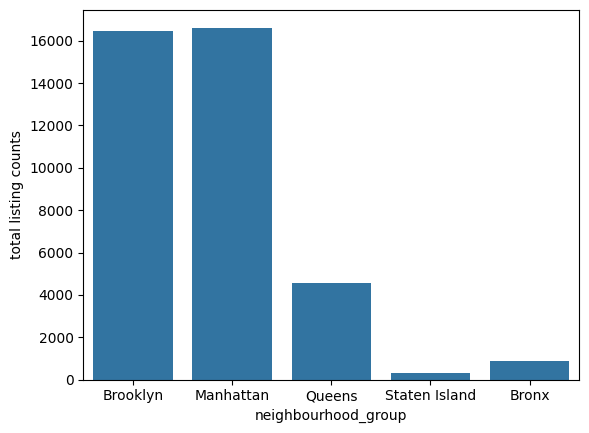

In [88]:
sns.countplot(x='neighbourhood_group',data=df)
plt.ylabel('total listing counts')
#for countplot it can be done directly without using value counts

In [89]:
#Average Price of each neighborhood Group

<Axes: xlabel='neighbourhood_group', ylabel='price'>

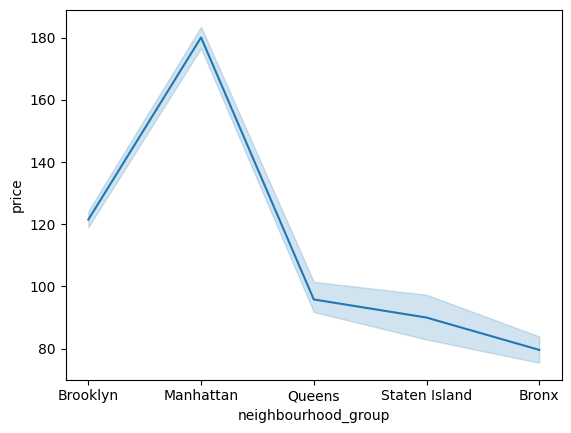

In [100]:
sns.lineplot(data=df,x='neighbourhood_group',y='price',estimator=np.mean)

In [101]:
#Price Distribution of Each Neighbourhood Group using Violin plot

In [109]:
price_distribution=df.groupby('neighbourhood_group')['price'].value_counts()

<Axes: ylabel='count'>

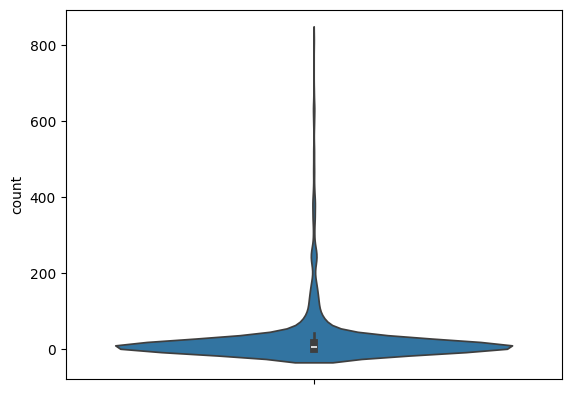

In [110]:
sns.violinplot(price_distribution)